In [305]:
# Import libraries:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [306]:
# Function that calculates the discount-rates sum:
def deltasumlog(i, n, delta):
    output = []
    while i <= n:
        otemp = delta**i
        output += [otemp]
        i += 1
    return sum(output)

def deltasumsqrt(i, n, delta):
    output = []
    while i <=n:
        otemp = (delta**(2*i))
        output += [otemp]
        i += 1
    return sum(output)


# Function that calculates the quality-yield of a certain amount of effort:
def qualitycalc(effort):
    threshold = 0.70
    if effort <= threshold:
        quality = effort / threshold
    #elif effort > -0.5 and effort < 0.5:
    elif effort > threshold and effort <= 1:
        quality = (1/(1-threshold))*(1-effort)
    else:
        quality = 0
    return quality
    

# Function that calculates all Efforts in all periods for a certain deadline
def contributioncalc(deadline, plots, uftype, printcontri):    
    strtemp = f"df_{deadline}"
    locals()[strtemp] = pd.DataFrame()

    period = 0
    j = 0
    indexlist = []
    while j <= deadline:
        indexlist += [j]
        j += 1
    locals()[strtemp]['Period'] = indexlist

    locals()[strtemp]['Period'] = indexlist

    while period <= deadline:
        contlist = []
        i = period
        z = 0
        v = 1
        while z < period:
            contlist += [locals()[strtemp].iloc[z,v]]
            z += 1
            v += 1

        if uftype == "log":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + beta * deltasumlog(1, deadline - i,delta)) )
        if uftype == "sqrt":
            cont = 1 - ( ( (deadline + 1 - i) - (w - sum(contlist)) ) / (1 + (beta**2) * deltasumsqrt(1, deadline - i, delta)) )

        contlist += [cont]
        i += 1

        while i <= deadline:
            if uftype == "log":
                calcu = (1-(1-cont)*(beta*(delta**i)))
            if uftype == "sqrt":
                calcu = (1-(1-cont)*((beta**2)*(delta**(2*i))))

            contlist += [calcu]
            i += 1
        
        if printcontri == True:
            print(contlist, sum(contlist))
        
        locals()[strtemp][f'C_P{period}'] = contlist
        if period == deadline:
            cltemp = contlist
        x = 0
        while x < period:
            locals()[strtemp].iloc[x,period+1] = None
            x += 1
        period += 1
    if plots == True:
        plot = locals()[strtemp].plot(x = 'Period', marker = '.', markersize = 3, title = f"Effort decisions by period for deadline = {deadline}",).legend(bbox_to_anchor=(1.0, 1.0)) ##colormap = 'hot')
        #plot



    return cltemp     

In [307]:
# Assign Variables

delta = 0.95        # Discount Factor
beta = 0.8          # Temporal Bias
w = 4        # Required accumulated Effort
r = 1.01           # Opportunity cost of a less tight deadline for the organization

print(f"delta = {delta}; beta = {beta}; w = {w};")

delta = 0.95; beta = 0.8; w = 4;


[-0.15827959252703505, 0.33097770735638443, 0.3962073808891371, 0.45507716125244624, 0.5082071380303328, 0.5561569420723753, 0.5994316402203188, 0.6384870552988378, 0.6737345674072011] 3.9999999999999982
[-0.15827959252703505, 0.04791633243324278, 0.5036940174361306, 0.5520838507361079, 0.5957556752893374, 0.635169496948627, 0.670740470996136, 0.7028432750740127, 0.7318160557542965] 4.281739582140856
[-0.15827959252703505, 0.04791633243324278, 0.22383227058043198, 0.634845053656868, 0.6704476609253235, 0.7025790139851045, 0.7315775601215568, 0.757748748009705, 0.7813682450787588] 4.392035292263956
[-0.15827959252703505, 0.04791633243324278, 0.22383227058043198, 0.3741807211067554, 0.7342839706160855, 0.7601912834810172, 0.7835726333416181, 0.8046743015908103, 0.8237185571857063] 4.394090477808633
[-0.15827959252703505, 0.04791633243324278, 0.22383227058043198, 0.3741807211067554, 0.5031116978521091, 0.8095965560503149, 0.8281608918354092, 0.8449152048814569, 0.8600359724055149] 4.33347

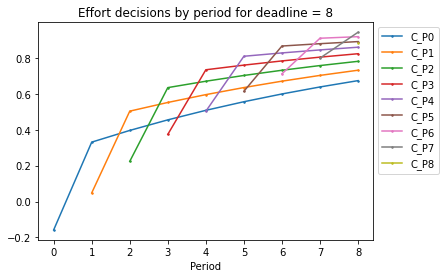

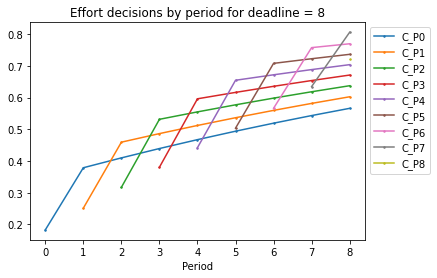

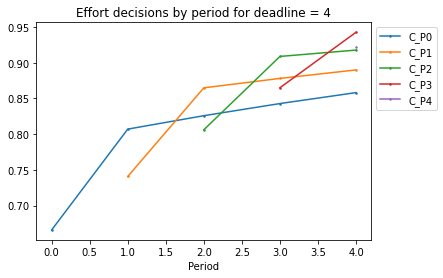

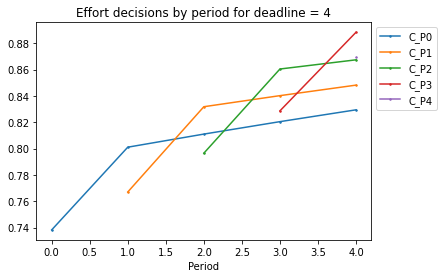

In [308]:
# Interesting Plots:
plottest1 = contributioncalc(8, True, "sqrt", True)
plottest2 = contributioncalc(8, True, "log", False)
plottest3 = contributioncalc(4, True, "sqrt", False)
plottest4 = contributioncalc(4, True, "log", False)

    deadline   quality  logquality  sqrtquality  profitslog  profitssqrt
0          4  3.333333    1.203973     1.825742    1.156994     1.754502
1          5  5.082626    1.625828     2.254468    1.546920     2.145049
2          6  5.440445    1.693861     2.332476    1.595694     2.197298
3          7  5.549695    1.713743     2.355779    1.598439     2.197278
4          8  5.607355    1.724079     2.367985    1.592158     2.186795
5          9  5.632119    1.728486     2.373209    1.580423     2.169919
6         10  5.635254    1.729042     2.373869    1.565279     2.149033
7         11  5.623878    1.727021     2.371472    1.547970     2.125606
8         12  5.602652    1.723240     2.366992    1.529288     2.100585
9         13  5.574722    1.718242     2.361085    1.509755     2.074597
10        14  5.542265    1.712403     2.354201    1.489727     2.048068
11        15  5.506815    1.705986     2.346660    1.469450     2.021295
12        16  5.469472    1.699182     2.338690    

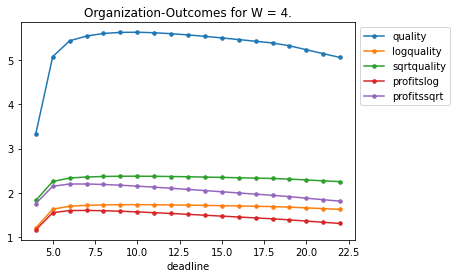

In [309]:
qualitydf = pd.DataFrame()
deadlinelist = []
qualitylist = []

t = int(w) # + 1
b = 2*t + 15

while t < b:
    quallist = [qualitycalc(i) for i in contributioncalc(t, False, "log", False)]
    if sum(quallist) > 1:
        qualsum = sum(quallist)
    else:
        qualsum = 1
    qualitylist += [qualsum]
    deadlinelist += [t]
    t += 1

sqrtquality = [i**0.5 for i in qualitylist]
logquality = [numpy.log(i) for i in qualitylist]

qualitydf['deadline'] = deadlinelist
qualitydf['quality'] = qualitylist
qualitydf['logquality'] = logquality
qualitydf['sqrtquality'] = sqrtquality

rows = len(qualitydf)
profitlist = []
profitlistsq = []
f = 0

while f < rows:
    dlin = qualitydf.iloc[f,0]
    lqual = qualitydf.iloc[f,2]
    squal = qualitydf.iloc[f,3]
    profitlog = ((1/(r**dlin))*lqual)
    profitsqrt = ((1/(r**dlin))*squal)
    profitlist += [profitlog]
    profitlistsq += [profitsqrt]
    f += 1

qualitydf['profitslog'] = profitlist
qualitydf['profitssqrt'] = profitlistsq

qualitydf.plot(x = 'deadline', marker = '.', markersize = 7, title = f"Organization-Outcomes for W = {w}.").legend(bbox_to_anchor=(1.0, 1.0))

print(qualitydf)

maxprofit = qualitydf['profitslog'].idxmax()
maxprofitsq = qualitydf['profitssqrt'].idxmax()
optimaldeadlinelog = qualitydf.iloc[maxprofit,0]
optimaldeadlinesqrt = qualitydf.iloc[maxprofitsq,0]

print(f"Log: The optimal Deadline is: {optimaldeadlinelog} Periods.")
print(f"Sqrt: The optimal Deadline is: {optimaldeadlinesqrt} Periods.")